In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots
import datetime
import seaborn as sns 
import scipy.stats
import plotly.express as px
import os 
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as smf
import scipy.stats as st
import pylab
import csv

os.getcwd()

'c:\\Users\\seong\\Desktop\\enitt\\Enitt'

In [25]:
## merge 1, 2 데이터
data1 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data2 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data3 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv", encoding="ms949")
data4 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 환경정보.csv", encoding="ms949")



data_12 = pd.concat([data2, data1])
data_34 = pd.concat([data4, data3])
ent_data_solar = data_12.reset_index().drop('index', axis=1)
ent_data_solar

ent_data_weather = data_34.reset_index().drop('index', axis=1)
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [26]:
## 파일불러오기
# def ent_loadfile(solar_path, weather_path):
#     ent_data_solar = pd.read_csv(solar_path)
#     ent_data_weather = pd.read_csv(weather_path)

#     return ent_data_solar, ent_data_weather


# ent_data_solar, ent_data_weather = ent_loadfile(
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", 
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv")

# ent_data_solar["pow_date"].unique() ## 약 2018-11-26~ 2020-03-02 
# ent_data_weather["env_date"].unique() ## 약 2018-11-26 ~ 2020-03-03  

# -> low data인 환경정보로 정리 필요 // 

## 외부데이터 불러오기 
def other_loadfile(a, b, c): ## 임의로 수정 필요 
    other_data_dummy1 = pd.read_csv(a, encoding="ms949")
    other_data_dummy2 = pd.read_csv(b, encoding="ms949")
    other_data_dummy3 = pd.read_csv(c, encoding="ms949")

    return other_data_dummy1, other_data_dummy2, other_data_dummy3

other_data_dummy1, other_data_dummy2, other_data_dummy3 = other_loadfile(
    "./ENITT_SOLAR_DATA/re_allweather/allweather2018.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2019.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2020.csv")


other_data_dummyall = other_data_dummy1.merge(other_data_dummy2, how="outer").merge(other_data_dummy3, how="outer")
other_data_weather = other_data_dummyall[other_data_dummyall["지점명"] == "수원"]
other_data_weather["지점명"].unique()

other_data_dummy1 = pd.read_csv("./ENITT_SOLAR_DATA/otherdata/otherdata.csv", encoding="ms949")
other_data_solar = other_data_dummy1[other_data_dummy1["발전기명"] == "안산연성정수장태양광"]
other_data_solar["발전기명"].unique()
# 2019-06-16 13:00
# ent_data_weather.loc[ent_data_weather["env_date"] == "2019-06-16"]

# print()
ent_data_solar1 = ent_data_solar[ent_data_solar["pow_id"] == 1]
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [27]:
## DELETE COLUMN AND EDIT COLUMN

## 지점', '지점명', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '운형(운형약어)', '지면온도(°C)'
#=>

## '기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '전운량', '지면온도'
reset_other_weather = other_data_weather.set_index("일시")
reset_other_weather_need = reset_other_weather[['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)']]
reset_other_weather_need.columns = ['기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '적설', '전운량', '지중온도']
reset_other_weather_need.fillna(0, inplace=True)
reset_other_weather_need



,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도
일시,,,,,,,,,,
2018-01-01 00:00,-1.8,0.0,2.0,290.0,43.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00,-2.6,0.0,0.9,270.0,46.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00,-3.0,0.0,1.1,320.0,48.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00,-4.2,0.0,0.4,0.0,58.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00,-5.3,0.0,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00,14.2,0.0,1.0,270.0,65.0,0.0,0.0,0.0,8.0,0.0
2020-10-31 20:00,14.7,0.0,1.3,230.0,63.0,0.0,0.0,0.0,10.0,0.0
2020-10-31 21:00,14.7,0.0,1.7,200.0,62.0,0.0,0.0,0.0,6.0,0.0


In [28]:
## 기업 solar weather EDA -> 필요
ent_data_weather.columns 

ent_data_weather["env_levelsolar"].describe()
ent_data_weather["env_slopesolar"].describe()


## 기업 날씨 데이터 1시간 별로 groupby , ( slopesolar, levelsolar => sum) , ( modtemp, airtemp => mean )
def groupby_weather():
    ## time 구분
    dummy_time_list = []
    for i in ent_data_weather["env_time"]:
        dummy_time_list.append(i[:2])

    ent_data_weather["dummy_time"] = dummy_time_list
    dummy_groupbyall = ent_data_weather.groupby(["env_date", "dummy_time"]).mean()

    # ent_data_dummy1_weather = ent_data_weather[["env_date", "dummy_time", "env_slopesolar", "env_levelsolar"]]
    # ent_data_dummy2_weather = ent_data_weather[["env_date", "dummy_time", "env_modtemp", "env_airtemp"]]
    # dummy_groupby1 = ent_data_dummy1_weather.groupby(["env_date", "dummy_time"]).mean()
    # dummy_groupby2 = ent_data_dummy2_weather.groupby(["env_date", "dummy_time"]).mean()
    # ent_data_weather_groupby = dummy_groupby1.merge(dummy_groupby2, on=["env_date", "dummy_time"], how="outer")

    ent_data_weather_groupby = dummy_groupbyall.reset_index() ## 그룹화된 인덱스 풀기 

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_weather_groupby.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_weather_sort = ent_data_weather_groupby[~drop_data].dropna()
    # print(ent_data_weather_sort)
    ent_data_weather_sort.drop("env_index", axis=1, inplace=True)

    return ent_data_weather_sort




## 기업 발전량 데이터 groupby
def groupby_solar():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_totpower"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    dummy_groupby1 = ent_data_need.groupby(["pow_date", "dummy_time"]).min()
    dummy_groupby2 = ent_data_need.groupby(["pow_date", "dummy_time"]).max()

    ## 유일한 값이면 어떻하지? 더 생각을 해봐야함,, 실제로 유일한 값이 있음 고쳐야 한다. 
    ## 최대값과 최솟값 차 = 1시간동안 발전한 총용량
    ent_data_perhour = dummy_groupby2["pow_totpower"] - dummy_groupby1["pow_totpower"]
    ent_data_perhour = ent_data_perhour.reset_index()

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort
    # print(ent_data_perhour_sort["dummy_time"].unique())




### weather, solar join
def join_weather_solar(a, b):
    sub_index1 = a["env_date"] + " " + a["dummy_time"] + ":00"
    a.index = sub_index1

    sub_index2 = b["pow_date"] + " " + b["dummy_time"] + ":00"
    b.index = sub_index2

    joinset = a.join(b["pow_totpower"])
    ent_data_solar_weather = joinset.dropna()


    return ent_data_solar_weather

ent_data_weather_sort = groupby_weather()
ent_data_perhour_sort = groupby_solar()
ent_data_solar_weather = join_weather_solar(ent_data_weather_sort, ent_data_perhour_sort)
ent_data_solar_weather
# pow_perhour 
# sns.boxplot(ent_data_weather_sort["env_slopesolar"])
# sns.boxplot(ent_data_weather_sort["env_levelsolar"])
# sns.boxplot(data = ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]])
# ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]]

# print(len(joinset) - 2504)



,env_date,dummy_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_totpower
2018-10-22 12:00,2018-10-22,12,333.375000,321.937500,25.050000,17.881250,5000.0
2018-10-22 13:00,2018-10-22,13,490.514286,563.442857,28.157143,18.405714,7000.0
2018-10-22 14:00,2018-10-22,14,368.214286,426.042857,26.777143,19.221429,5000.0
2018-10-22 15:00,2018-10-22,15,242.214286,294.400000,21.861429,18.455714,3000.0
2018-10-22 16:00,2018-10-22,16,116.159420,132.362319,18.288406,17.346377,2000.0
...,...,...,...,...,...,...,...
2020-10-22 14:00,2020-10-22,14,491.916667,695.333333,23.758333,17.483333,6000.0
2020-10-22 15:00,2020-10-22,15,385.500000,638.750000,21.791667,17.800000,4000.0
2020-10-22 16:00,2020-10-22,16,154.000000,280.461538,16.684615,15.915385,2000.0
2020-10-22 17:00,2020-10-22,17,11.166667,15.750000,12.875000,13.850000,0.0


In [29]:
## 기업, 공공 join

join_ent_other = ent_data_solar_weather.join(reset_other_weather_need)
join_ent_other["일사"].fillna(0, inplace=True)
# join_ent_other
join_ent_other["match_solar"] = join_ent_other["일사"] * 1000000 / 3600
join_ent_other_set = join_ent_other.drop(["env_date", "dummy_time"], axis=1)

## csv로 저장
join_ent_other_set.to_csv('banpo1_join.csv', encoding='utf-8')

join_ent_other_set


,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_totpower,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar
2018-10-22 12:00,333.375000,321.937500,25.050000,17.881250,5000.0,17.9,0.0,1.0,160.0,43.0,1.0,1.93,0.0,8.0,0.0,536.111111
2018-10-22 13:00,490.514286,563.442857,28.157143,18.405714,7000.0,19.5,0.0,1.7,140.0,42.0,0.7,1.61,0.0,8.0,0.0,447.222222
2018-10-22 14:00,368.214286,426.042857,26.777143,19.221429,5000.0,19.7,0.0,1.8,200.0,38.0,0.8,1.59,0.0,8.0,0.0,441.666667
2018-10-22 15:00,242.214286,294.400000,21.861429,18.455714,3000.0,19.0,0.0,1.3,180.0,41.0,0.6,1.21,0.0,8.0,0.0,336.111111
2018-10-22 16:00,116.159420,132.362319,18.288406,17.346377,2000.0,18.5,0.0,1.8,200.0,41.0,0.2,0.66,0.0,9.0,0.0,183.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-22 14:00,491.916667,695.333333,23.758333,17.483333,6000.0,18.1,0.0,4.5,270.0,44.0,1.0,2.06,0.0,3.0,0.0,572.222222
2020-10-22 15:00,385.500000,638.750000,21.791667,17.800000,4000.0,17.2,0.0,4.4,270.0,47.0,1.0,1.85,0.0,2.0,0.0,513.888889
2020-10-22 16:00,154.000000,280.461538,16.684615,15.915385,2000.0,16.7,0.0,4.4,270.0,46.0,1.0,1.27,0.0,1.0,0.0,352.777778
2020-10-22 17:00,11.166667,15.750000,12.875000,13.850000,0.0,15.6,0.0,3.3,270.0,45.0,1.0,0.63,0.0,1.0,0.0,175.000000


In [30]:
join_ent_other_set.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_totpower,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar
env_slopesolar,1.000000,0.922769,0.607467,0.261036,0.970358,0.213852,-0.125288,0.080234,0.079151,-0.331865,0.521316,0.839998,-0.039394,-0.381401,-0.003259,0.839998
env_levelsolar,0.922769,1.000000,0.420632,0.074844,0.864514,0.028737,-0.128995,0.088889,0.145568,-0.470201,0.606171,0.796714,-0.024526,-0.507432,-0.003887,0.796714
env_modtemp,0.607467,0.420632,1.000000,0.913855,0.600015,0.884179,-0.018123,0.042415,-0.093636,0.013897,0.127131,0.595327,-0.138398,0.034302,0.020750,0.595327
env_airtemp,0.261036,0.074844,0.913855,1.000000,0.261062,0.988688,0.033624,0.093144,-0.105923,0.147349,-0.077764,0.337791,-0.142751,0.201570,0.026968,0.337791
pow_totpower,0.970358,0.864514,0.600015,0.261062,1.000000,0.222272,-0.122520,0.066910,0.046777,-0.265184,0.479936,0.802479,-0.080130,-0.339284,-0.005709,0.802479
기온,0.213852,0.028737,0.884179,0.988688,0.222272,1.000000,0.047792,0.117232,-0.103304,0.157757,-0.101345,0.315179,-0.143283,0.227181,0.026080,0.315179
강수량,-0.125288,-0.128995,-0.018123,0.033624,-0.122520,0.047792,1.000000,-0.004909,-0.062644,0.218157,-0.171306,-0.159630,0.003460,0.146886,-0.002635,-0.159630
풍속,0.080234,0.088889,0.042415,0.093144,0.066910,0.117232,-0.004909,1.000000,0.257377,-0.134523,0.134559,0.218838,0.049181,-0.069890,-0.004231,0.218838
풍향,0.079151,0.145568,-0.093636,-0.105923,0.046777,-0.103304,-0.062644,0.257377,1.000000,-0.252306,0.258433,0.164911,0.019663,-0.253876,-0.021466,0.164911
습도,-0.331865,-0.470201,0.013897,0.147349,-0.265184,0.157757,0.218157,-0.134523,-0.252306,1.000000,-0.609290,-0.467519,0.080552,0.531218,-0.008148,-0.467519


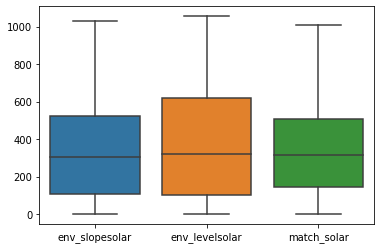

In [31]:
sns.boxplot(data = join_ent_other_set[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [32]:
import scipy.stats

print(scipy.stats.pearsonr(join_ent_other_set["env_levelsolar"], join_ent_other_set["match_solar"]), scipy.stats.pearsonr(join_ent_other_set["env_slopesolar"], join_ent_other_set["match_solar"]))

(0.7967140847863701, 0.0) (0.8399981273674204, 0.0)


In [35]:
### -일사량이 중요함으로 보아 공공데이터, 기업데이터 일사량이 한개라도 0이 있다면 모두 제거하였음

join_ent_other_del0 = join_ent_other_set[join_ent_other_set["env_slopesolar"] != 0 ]
join_ent_other_del0 = join_ent_other_del0[join_ent_other_del0["env_levelsolar"] != 0 ]
join_ent_other_del0 = join_ent_other_del0[join_ent_other_del0["match_solar"] != 0 ]
thinkmore = join_ent_other_del0[join_ent_other_del0["pow_totpower"] != 0 ]

# join_ent_other_set[join_ent_other_set["pow_totpower"] == 0]

thinkmore.describe()



,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_totpower,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,380.358560,419.626386,22.395389,15.644559,5603.336653,16.550398,0.109686,2.464691,203.443725,63.912600,0.635508,1.378909,0.006624,5.287849,0.007022,383.030378
std,244.136265,279.914258,12.452647,10.544798,3465.651245,10.152884,0.820809,1.304793,91.047964,18.743164,0.430591,0.807327,0.114528,3.884357,0.444992,224.257527
min,1.544118,0.338235,-12.568571,-14.415714,1000.000000,-11.900000,0.000000,0.000000,0.000000,13.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.777778
25%,166.157143,165.271978,12.290537,6.616786,3000.000000,7.900000,0.000000,1.500000,140.000000,51.000000,0.100000,0.720000,0.000000,1.000000,0.000000,200.000000
50%,353.572464,372.785714,23.431884,17.693571,5000.000000,18.600000,0.000000,2.300000,230.000000,63.000000,0.900000,1.320000,0.000000,6.000000,0.000000,366.666667
75%,552.051082,656.850621,31.515625,24.623997,8000.000000,25.225000,0.000000,3.200000,270.000000,77.000000,1.000000,1.930000,0.000000,9.000000,0.000000,536.111111
max,1028.916667,1055.583333,53.960000,37.808571,16000.000000,35.900000,17.700000,13.100000,360.000000,100.000000,1.000000,3.630000,4.200000,10.000000,28.200000,1008.333333


In [36]:
thinkmore.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_totpower,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar
env_slopesolar,1.000000,0.902615,0.567833,0.225656,0.964405,0.183729,-0.134296,0.082294,0.109374,-0.365414,0.537641,0.818260,-0.011328,-0.434047,0.000704,0.818260
env_levelsolar,0.902615,1.000000,0.339920,0.004646,0.829091,-0.035934,-0.142095,0.091380,0.187036,-0.529204,0.636181,0.763455,0.014316,-0.579692,-0.002164,0.763455
env_modtemp,0.567833,0.339920,1.000000,0.917128,0.554884,0.889432,-0.014564,0.047458,-0.079598,0.017146,0.107056,0.571241,-0.094127,0.035736,0.015187,0.571241
env_airtemp,0.225656,0.004646,0.917128,1.000000,0.221019,0.988913,0.042605,0.110875,-0.092413,0.159277,-0.100759,0.327974,-0.098203,0.219840,0.016687,0.327974
pow_totpower,0.964405,0.829091,0.554884,0.221019,1.000000,0.189412,-0.128136,0.071760,0.074549,-0.285580,0.491991,0.773321,-0.042952,-0.388802,0.001807,0.773321
기온,0.183729,-0.035934,0.889432,0.988913,0.189412,1.000000,0.050265,0.136210,-0.086367,0.165276,-0.120203,0.312560,-0.097432,0.242499,0.015779,0.312560
강수량,-0.134296,-0.142095,-0.014564,0.042605,-0.128136,0.050265,1.000000,0.004852,-0.059319,0.228942,-0.192893,-0.177594,0.016751,0.158565,-0.002109,-0.177594
풍속,0.082294,0.091380,0.047458,0.110875,0.071760,0.136210,0.004852,1.000000,0.263470,-0.152747,0.122560,0.232918,0.000949,-0.062837,-0.000783,0.232918
풍향,0.109374,0.187036,-0.079598,-0.092413,0.074549,-0.086367,-0.059319,0.263470,1.000000,-0.243529,0.249882,0.195319,0.025137,-0.235233,-0.016199,0.195319
습도,-0.365414,-0.529204,0.017146,0.159277,-0.285580,0.165276,0.228942,-0.152747,-0.243529,1.000000,-0.614800,-0.507954,0.032885,0.518845,0.002600,-0.507954


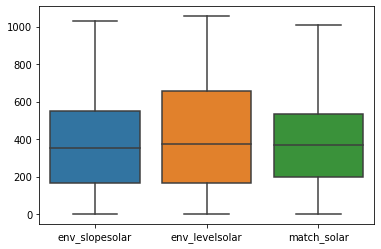

In [37]:
sns.boxplot(data = thinkmore[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [34]:
# from sklearn.model_selection import train_test_split
# from scipy import stats
# from sklearn.linear_model import LinearRegression

# x_train, x_test , y_train, y_test = train_test_split(thinkmore["match_solar"], thinkmore["pow_totpower"], test_size=0.25, shuffle=True, random_state=42)

# x_train_set = x_train.to_numpy()
# x_train_set = x_train_set.reshape(-1, 1)
# y_train_set = y_train.to_numpy()
# y_train_set = y_train_set.reshape(-1, 1)
# x_test_set = x_test.to_numpy()
# x_test_set = x_test_set.reshape(-1, 1)
# y_test_set = y_test.to_numpy()
# y_test_set = y_test_set.reshape(-1, 1)

# # print(x_train_set)
# my_model = LinearRegression()
# my_model.fit(x_train_set,y_train_set)
# predY_in = my_model.predict(x_train_set)
# predY_out = my_model.predict(x_test_set)

# metrics.mean_squared_error(y_train_set, predY_in)
# # my_model = smf.ols(formula = "pow_totpower ~ match_solar", data=thinkmore)
# # my_model = my_model.fit()
# # my_model.summary()
